# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading Dataset

In [2]:
data = pd.read_csv("startup_funding.csv")
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


# Data Pre - Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [4]:
data.isna().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [5]:
data["Date dd/mm/yyyy"].value_counts()

30/11/2016    11
08/07/2015    11
02/02/2015    11
04/10/2016    10
08/02/2016     9
              ..
22/08/2019     1
14/04/2015     1
01/02/2019     1
04/11/2017     1
02/06/2017     1
Name: Date dd/mm/yyyy, Length: 1035, dtype: int64

In [6]:
# converting the Date column into dtype:Datetime

data["Date dd/mm/yyyy"].replace(["05/072018"],["05/07/2018"], inplace = True)
data["Date dd/mm/yyyy"] = pd.to_datetime(data["Date dd/mm/yyyy"], errors = "coerce")

# seperating year from fulldate
data["Date dd/mm/yyyy"] = pd.DatetimeIndex(data["Date dd/mm/yyyy"]).year

#changing the column name into 'year'
data.rename(columns = {"Date dd/mm/yyyy":"year"}, inplace = True)

# handling nan values of 'year' column  
data["year"] = data["year"].astype(str)
data["year"].replace(["nan"],["2016.0"], inplace = True)

# spliting by dot and storing year properly
data["year"] = data["year"].apply(lambda x:x.split(".")[0])
data["year"] = data["year"].astype(int)

data.head()

,Sr No,year,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [7]:
data.isna().sum()

Sr No                   0
year                    0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [8]:
# checking unique values of "Startup name"
data["Startup Name"].unique()

# handling symbols
data["Startup Name"].replace(["https://www.wealthbucket.in/"],["WealthBucket"], inplace = True)
data["Startup Name"] = data["Startup Name"].apply(lambda x:x.split(".")[0])
data["Startup Name"] = data["Startup Name"].apply(lambda x:x.split('\\')[0])
data.head()

,Sr No,year,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2020,WealthBucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [9]:
# checking unique values of 'Industry Vertical'
data["Industry Vertical"].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup',
       'Finance', 'Video', 'Gaming', 'Software', 'Health and wellness',
       'Education', 'Food and Beverage', 'Health and Wellness',
       'B2B Marketing', 'Video Games', 'SaaS', 'Last Mile Transportation',
       'Healthcare', 'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media', 'Saas',
       'Automobile', 'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Nanotechnology', 'Services Platfo

In [10]:
# changing the dtype of the 'Industry Vertical' column 
data["Industry Vertical"] = data["Industry Vertical"].astype(str)

# handling unnecessary type of symbols and storing the values properly
data["Industry Vertical"] = data["Industry Vertical"].apply(lambda x :x.replace("/"," or "))
data["Industry Vertical"] = data["Industry Vertical"].apply(lambda x :x.split('0')[0])
data["Industry Vertical"] = data["Industry Vertical"].apply(lambda x :x.replace('\\\\n'," "))
data["Industry Vertical"] = data["Industry Vertical"].apply(lambda x :x.split('\\\\')[0])
data["Industry Vertical"] = data["Industry Vertical"].apply(lambda x :x.replace("&","and"))
                                                             
# replacing the 'nan' values and other values with mode of the "Industry Vertical" column
data["Industry Vertical"].replace(['WiFi \\xe2\\x8','36','nan'],['WiFi',"Consumer Internet","Consumer Internet"],
                                  inplace = True)

In [11]:
data.isna().sum()

Sr No                   0
year                    0
Startup Name            0
Industry Vertical       0
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [12]:
#checking unique values of 'SubVertical' column
data["SubVertical"].unique()

array(['E-learning', 'App based shuttle service',
       'Retailer of baby and toddler products', ...,
       'Hobby & Activity Class Aggregator', 'Interior Design Marketplace',
       nan], dtype=object)

In [13]:
# changing the dtype of the column 'SubVertical'
data["SubVertical"] = data["SubVertical"].astype(str)

# replacing the 'nan' value
data["SubVertical"].replace(['Hobby & Activity Class Aggregator','nan'],
                            ['Hobby and Activity Class Aggregator','Activity Class Aggregator'],inplace = True)
data.head()

,Sr No,year,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2020,WealthBucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [14]:
# changing unique values of "City Location" column

data["City  Location"].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', nan, 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala', 'Kozhiko

In [15]:
#changing dtype type "City location" column
data["City  Location"] = data["City  Location"].astype(str)

#handling the unnecessary symbols
data ["City  Location"] = data["City  Location"].apply(lambda x :x.replace("/"," or "))
data ["City  Location"] = data["City  Location"].apply(lambda x :x.split('0')[-1])

# replacing 'nan' and other type values with mode value
data["City  Location"].replace(['\\\\xc2\\\\xa','nan'],["Bangalore","Bangalore"], inplace = True)

In [16]:
data.isna().sum()

Sr No                   0
year                    0
Startup Name            0
Industry Vertical       0
SubVertical             0
City  Location          0
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [17]:
# checking unique values of 'Investors Name' column
data["Investors Name"].unique()

array(['Tiger Global Management', 'Susquehanna Growth Equity',
       'Sequoia Capital India', ..., 'KARSEMVEN Fund',
       'Exfinity Fund, GrowX Ventures.',
       'UK based Group of Angel Investors'], dtype=object)

In [18]:
#changing dtype type "City location" column
data["Investors Name"] = data["Investors Name"].astype(str)

# handling 'nan' values
data["Investors Name"].replace(['nan'],['Undisclosed Investors'], inplace = True)

In [19]:
data["InvestmentnType"].unique()

array(['Private Equity Round', 'Series C', 'Series B', 'Pre-series A',
       'Seed Round', 'Series A', 'Series D', 'Seed', 'Series F',
       'Series E', 'Debt Funding', 'Series G', 'Series H', 'Venture',
       'Seed Funding', nan, 'Funding Round', 'Corporate Round',
       'Maiden Round', 'pre-series A', 'Seed Funding Round',
       'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
       'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Debt', 'Pre Series A', 'Equity',
       'Debt-Funding', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Private Funding', 'Seed / Angel Funding',
       'Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding',
       'Angel / Seed Funding', 'Private', 'Structured Debt', 'Term Loan',
       'PrivateEquity', 'Angel Funding', 'Seed\\\\nFunding',
       'Private\\\\nEqui

In [20]:
# changing dtype into Str
data["InvestmentnType"] = data["InvestmentnType"].astype(str)

# handling unnecessary symbols 
data["InvestmentnType"] = data["InvestmentnType"].apply(lambda x:x.replace('/',"or"))
data["InvestmentnType"] = data["InvestmentnType"].apply(lambda x:x.replace('\\\\n', ' '))
data["InvestmentnType"] = data["InvestmentnType"].apply(lambda x:x.replace('-',""))

# replacing 'nan' and other values
data["InvestmentnType"].replace(['Series B (Extension)','nan'],["Series B","Seed Funding"], inplace =True)

In [21]:
data.isna().sum()

Sr No                   0
year                    0
Startup Name            0
Industry Vertical       0
SubVertical             0
City  Location          0
Investors Name          0
InvestmentnType         0
Amount in USD         960
Remarks              2625
dtype: int64

In [22]:
data["Amount in USD"].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [23]:
# handling null values and other symbols

data["Amount in USD"] = data["Amount in USD"].replace(["Undisclosed","undisclosed"],np.nan)

data["Amount in USD"] = data["Amount in USD"].astype(str)
data["Amount in USD"] = data["Amount in USD"].apply(lambda x:x.replace(",",""))
data["Amount in USD"] = data["Amount in USD"].apply(lambda x: x.split("\\\\xa0")[-1])

data["Amount in USD"].replace(["nan","N/A","14342000+","unknown"],['503568','8965242','14342000','2546358'],inplace = True)
data["Amount in USD"] = data["Amount in USD"].apply(lambda x:x.split(".")[0])
data["Amount in USD"] = data["Amount in USD"].astype("int64")

data["Amount in USD"].replace(to_replace=[data["Amount in USD"][data["Amount in USD"]<=300000].values],
                                                                                  value =np.nan, inplace = True)
data["Amount in USD"].replace(to_replace=[data["Amount in USD"][data["Amount in USD"]>=9000000].values],
                                                                                  value =np.nan, inplace = True)

data["Amount in USD"].fillna(data["Amount in USD"].median(), inplace = True)

In [24]:
data.isna().sum()

Sr No                   0
year                    0
Startup Name            0
Industry Vertical       0
SubVertical             0
City  Location          0
Investors Name          0
InvestmentnType         0
Amount in USD           0
Remarks              2625
dtype: int64

In [25]:
# dropping unwanted columns 
data.drop(columns =["Sr No","Remarks"], inplace = True )
data["Amount in USD"] = data["Amount in USD"].astype(int)
data.head()

,year,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,503568
1,2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
2,2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,503568
3,2020,WealthBucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Preseries A,3000000
4,2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               3044 non-null   int32 
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  3044 non-null   object
 3   SubVertical        3044 non-null   object
 4   City  Location     3044 non-null   object
 5   Investors Name     3044 non-null   object
 6   InvestmentnType    3044 non-null   object
 7   Amount in USD      3044 non-null   int32 
dtypes: int32(2), object(6)
memory usage: 166.6+ KB


In [27]:
# droping duplicate rows
data.drop_duplicates(inplace = True)
data.head()

,year,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,503568
1,2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
2,2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,503568
3,2020,WealthBucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Preseries A,3000000
4,2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000


In [28]:
# handling categorical features by doing 'get_dummies'

k = pd.get_dummies(data[["Startup Name","Industry Vertical","SubVertical","City  Location",
                                                                "Investors Name","InvestmentnType"]])
data = pd.concat([data,k], axis = 1)

#dropping duplicate columns
data.drop(columns = ["Startup Name","Industry Vertical","SubVertical","City  Location",
                                                                "Investors Name","InvestmentnType"], inplace = True)
data.head()

,year,Amount in USD,Startup Name_,"Startup Name_""BYJU",Startup Name_#Fame,Startup Name_121Policy,Startup Name_19th mile,Startup Name_1Crowd,Startup Name_1mg,Startup Name_1mg (Healthkartplus),...,InvestmentnType_Series H,InvestmentnType_Series J,InvestmentnType_Single Venture,InvestmentnType_Structured Debt,InvestmentnType_Term Loan,InvestmentnType_Venture,InvestmentnType_Venture Series Unknown,InvestmentnType_Venture Round,InvestmentnType_preSeries A,InvestmentnType_preseries A
0,2020,503568,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,8048394,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,503568,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,3000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,1800000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training and Spliting dataset

In [29]:
x = data.drop(columns = ["Amount in USD"])
y = data["Amount in USD"]

In [30]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 10)

 # Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train,y_train)
pre = lnr.predict(x_test)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f"mean_absolute_error of LinearRegressor : {mean_absolute_error(pre,y_test)}")
print(f"mean_squared_error of LinearRegressor  : {mean_squared_error(pre,y_test)}")

mean_absolute_error of LinearRegressor : 3345126576161202.0
mean_squared_error of LinearRegressor  : 3.417013412328726e+32


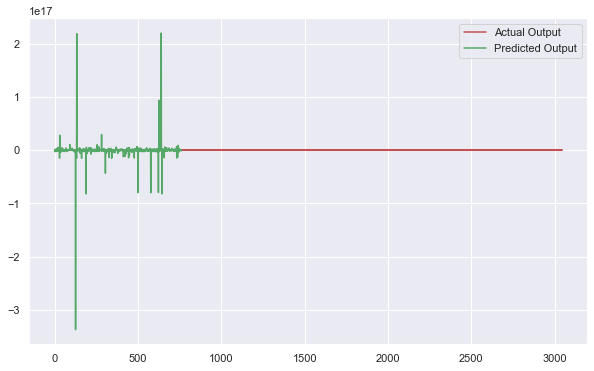

In [37]:
plt.figure(figsize = (10,6))
plt.plot(y_test, color ="r", label="Actual Output")
plt.plot(pre, color ="g", label="Predicted Output")
plt.legend()

In [38]:
print(y_test)

486     3600000
1948    4000000
508      503568
1417    1800000
1708     503568
         ...   
1560     503568
2856     503568
1901     400000
465     4000000
2660     503568
Name: Amount in USD, Length: 761, dtype: int32


In [ ]:
plt.plot(pre)
plt.show()
plt.plot(y_test)

In [ ]:
pre

In [ ]:
y_test.values